In [66]:
import pandas as pd
import numpy as np
import skfuzzy
from matplotlib import pyplot as plt

In [67]:
veloc=pd.read_clipboard(header=None)
veloc[veloc.index==2]=['Zero', 'Zero','(Z)',0,0,0,0,0,0.5,1.0,0.5,0,0,0,0,0]
veloc[0]=veloc[0]+" "+veloc[1]
veloc=veloc.drop([1,2], axis=1)
veloc.columns=['set',-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30]
veloc

,set,-30,-25,-20,-15,-10,-5,0,5,10,15,20,25,30
0,Up large,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.5,1,1,1.0
1,Up small,0,0,0,0.0,0.0,0.0,0.0,0.5,1,0.5,0,0,0.0
2,Zero Zero,0,0,0,0.0,0.0,0.5,1.0,0.5,0,0.0,0,0,0.0
3,Down small,0,0,0,0.5,1.0,0.5,0.0,0.0,0,0.0,0,0,0.0
4,Down large,1,1,1,0.5,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0


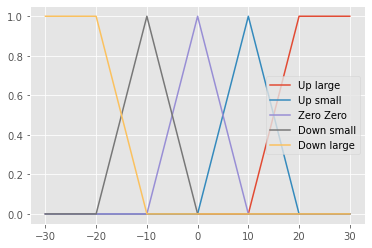

In [68]:
vvals=np.array(veloc[[-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30]])
X=[-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30]
classes=list(veloc.set)
for i in range(5):
    plt.plot(X,vvals[i,:],label=classes[i])
plt.legend()
plt.show()

In [71]:
height=pd.read_clipboard(header=None)
height.loc[3]=['Near-zero', '(NZ)', 1, 0.8, 0.6, 0.4, 0.2, 0, 0, 0, 0, 0, 0]
height=height.drop([1],axis=1)
col=['set']
col.extend([int(i) for i in '0 100 200 300 400 500 600 700 800 900 1000'.split()])
height.columns=col
height

,set,0,100,200,300,400,500,600,700,800,900,1000
0,Large,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.4,0.6,0.8,1.0
1,Medium,0.0,0.0,0.0,0.0,0.2,0.4,0.6,0.8,1.0,0.8,0.6
2,Small,0.4,0.6,0.8,1.0,0.8,0.6,0.4,0.2,0.0,0.0,0.0
3,Near-zero,1.0,0.8,0.6,0.4,0.2,0.0,0.0,0.0,0.0,0.0,0.0


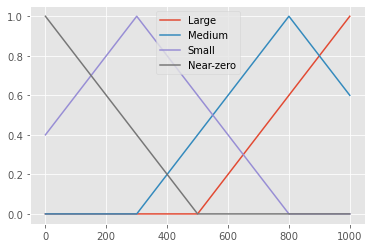

In [72]:
hvals=np.array(height[[0 ,100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]])
X=[0 ,100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
classes=list(height.set)
for i in range(4):
    plt.plot(X,hvals[i,:],label=classes[i])
plt.legend()
plt.show()

In [69]:
force=pd.read_clipboard(header=None)
force[force.index==2]=['Zero', 'Zero','(Z)',0,0,0,0,0,0.5,1.0,0.5,0,0,0,0,0]
force[0]=force[0]+" "+force[1]
force=force.drop([1,2], axis=1)
force.columns=['set',-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30]
force

,set,-30,-25,-20,-15,-10,-5,0,5,10,15,20,25,30
0,Up large,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.5,1,1,1.0
1,Up small,0,0,0,0.0,0.0,0.0,0.0,0.5,1,0.5,0,0,0.0
2,Zero Zero,0,0,0,0.0,0.0,0.5,1.0,0.5,0,0.0,0,0,0.0
3,Down small,0,0,0,0.5,1.0,0.5,0.0,0.0,0,0.0,0,0,0.0
4,Down large,1,1,1,0.5,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0


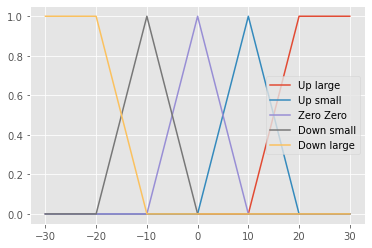

In [70]:
from matplotlib import pyplot as plt
vals=np.array(force[[-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30]])
X=[-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30]
classes=list(force.set)
for i in range(5):
    plt.plot(X,vals[i,:],label=classes[i])
plt.legend()
plt.show()

### Define membership functions

In [73]:
def velocity_membership(v):
    membership=dict()
    classes=['UL','US','Z','DS','DL']
    if(v>20):
        membership['UL']=1
    elif(v>10):
        membership['UL']=(v-20)/10+1
        membership['US']=(20-v)/10
    elif(v>0):
        membership['US']=(v-10)/10+1
        membership['Z']=(10-v)/10
    elif(v>-10):
        membership['Z']=(v)/10+1
        membership['DS']=(-v)/10
    elif(v>-20):
        membership['DS']=(v+10)/10+1
        membership['DL']=(-10-v)/10
    else:
        membership['DL']=1
    return membership

In [74]:
def height_membership(h):
    membership=dict()
    classes=['L','M','S','NZ']
    if h<500 :
        membership['NZ']=(-h/500)+1
    if(h>500):
        membership['L']=(h-500)/500
    if(h>=300 and h<800):
        membership['S']=(300-h)/500+1
    if(h<300):
        membership['S']=h/500+0.4
    if(h>300 and h<=800):
        membership['M']=(h-800)/500+1
    if(h>800):
        membership['M']=(1000-h)/500+0.6
    return membership

### FAM Table

In [75]:
table=pd.read_clipboard()
table

,Height,DL,DS,Zero,US,UL
0,L,Z,DS,DL,DL,DL
1,M,US,Z,DS,DL,DL
2,S,UL,US,Z,DS,DL
3,NZ,UL,UL,Z,DS,DS


In [106]:
table.columns=['Height', 'DL', 'DS', 'Z', 'US', 'UL']
table

,Height,DL,DS,Z,US,UL
0,L,Z,DS,DL,DL,DL
1,M,US,Z,DS,DL,DL
2,S,UL,US,Z,DS,DL
3,NZ,UL,UL,Z,DS,DS


In [76]:
def get_force(veloc,height):
    return table[table['Height']==height][veloc].item()

In [77]:
get_force('DL','M')

'US'

In [78]:
def force_rules(rule,value):
    if rule == 'UL':
        if 20 <= value <= 30:
            return 1

        if 10 <= value <= 20:
            return value/10 -1

        return 0
  
    if rule == 'US':
        if 0 <= value <= 10:  
            return value/10

        if 10 <= value <= 20:
            return -value/10 + 2

        return 0
  
    if rule == 'Z':
        if -10 <= value <= 0:
            return value/10 + 1

        if 0 <= value <= 10:
            return -value/10 + 1
        return 0

    if rule == 'DS':
        if -20 <= value <= -10:
            return value/10 + 2

        if -10 <= value <= 0:
            return -value/10

    if rule == "DL":
        if -30<= value <=-20:
            return 1

        if -20 <= value <= -10:
            return -value/10 - 1

    return 0



### Fuzzifier

In [79]:
def fuzzifier(heights,veloc):
    force=[]
    for i in heights:
        for j in veloc:
            cls=get_force(j,i)
            mem=min(heights[i],veloc[j])
            force.append([cls,mem])
    return force

### De-fuzzifier

In [95]:
def defuzzy(fuzz):
    de_fuzz=[]
    for i in np.linspace(-30,30,600):
        maxz = float('-inf')
        for k,v in fuzz:
            val = force_rules(k, i)
            val = min(val, v)
            maxz = max(maxz, val)
        de_fuzz.append(maxz)
    return de_fuzz    

### Run

In [119]:
import skfuzzy as fuzzy
import numpy as np

hgt = 1000  #initial height
velo = -20  #initial velocity
h_arr = [1000]
v_arr = [-20]

for itr in range(70):
    h = height_membership(hgt)
    v = velocity_membership(velo)

    print("From Height Fuzzy function:",h)
    print("From Velocity Fuzzy function:",v)

    fuzz = fuzzifier(h,v)
   
    de_fuzz = defuzzy(fuzz)
    print(len(de_fuzz))
  
    FORCE = fuzzy.centroid([x for x in np.linspace(-30,30,600)], de_fuzz)
    print("FORCE", FORCE)
  
    hgt = hgt + velo
    velo = velo + FORCE
    h_arr.append(hgt)
    v_arr.append(velo)
    print("Height", hgt)
    print("Velocity", velo)
    print("\n\n---------------------------")

From Height Fuzzy function: {'L': 1.0, 'M': 0.6}
From Velocity Fuzzy function: {'DL': 1}
600
FORCE 4.496830237982077
Height 980
Velocity -15.503169762017922


---------------------------
From Height Fuzzy function: {'L': 0.96, 'M': 0.64}
From Velocity Fuzzy function: {'DS': 0.4496830237982078, 'DL': 0.5503169762017922}
600
FORCE 0.5535128688609982
Height 964.4968302379821
Velocity -14.949656893156924


---------------------------
From Height Fuzzy function: {'L': 0.9289936604759641, 'M': 0.6710063395240359}
From Velocity Fuzzy function: {'DS': 0.5050343106843076, 'DL': 0.49496568931569235}
600
FORCE -0.05734668268588093
Height 949.5471733448252
Velocity -15.007003575842804


---------------------------
From Height Fuzzy function: {'L': 0.8990943466896504, 'M': 0.7009056533103496}
From Velocity Fuzzy function: {'DS': 0.49929964241571967, 'DL': 0.5007003575842803}
600
FORCE 0.008027638130178809
Height 934.5401697689824
Velocity -14.998975937712625


---------------------------
From Heigh

600
FORCE 0.4192321247115654
Height 502.98770169489217
Velocity -4.834123006096717


---------------------------
From Height Fuzzy function: {'L': 0.005975403389784333, 'S': 0.5940245966102157, 'M': 0.40597540338978433}
From Velocity Fuzzy function: {'Z': 0.5165876993903283, 'DS': 0.48341230060967166}
600
FORCE 0.4016632560633321
Height 498.15357868879545
Velocity -4.432459750033384


---------------------------
From Height Fuzzy function: {'NZ': 0.0036928426224090982, 'S': 0.6036928426224091, 'M': 0.3963071573775909}
From Velocity Fuzzy function: {'Z': 0.5567540249966616, 'DS': 0.44324597500333845}
600
FORCE 0.36411898438596435
Height 493.72111893876206
Velocity -4.06834076564742


---------------------------
From Height Fuzzy function: {'NZ': 0.012557762122475835, 'S': 0.6125577621224758, 'M': 0.3874422378775241}
From Velocity Fuzzy function: {'Z': 0.593165923435258, 'DS': 0.406834076564742}
600
FORCE 0.32248010464451354
Height 489.65277817311465
Velocity -3.7458606610029066


------

<function matplotlib.pyplot.show(*args, **kw)>

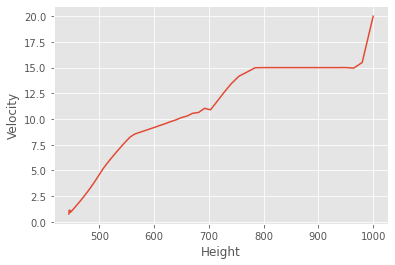

In [120]:
plt.plot(h_arr, [-x for x in v_arr])
plt.xlabel("Height")
plt.ylabel("Velocity")

plt.show

### Conclusion

Thus the aircraft landing problem has been simulated using fuzzy logic.